# Team 4 - Final Deliverable

### Analysis of Governmental Response to COVID-19 Outbreak

**Goal of project**

to better understand how stringent governmental responses affect the spread of COVID-19. Specifically, we are attempting to validate the stringency index create in terms of confirmed COVID-19 cases and deaths.

**Data**

OxCGRT collects publicly available information on 11 indicators of government response, such as school closings, travel bans, or other measures.
Full data dictionary can be located here: https://www.bsg.ox.ac.uk/sites/default/files/2020-04/BSG-WP-2020-031-v4.0_0.pdf

We also use the 2020 Population of the world dataset to obtain information about the population of the countries affected by COVID-19. We merge the dataset with the OxCGRT dataset. Full data dictionary can be found here: https://www.kaggle.com/tanuprabhu/population-by-country-2020


## Data dictionary


*  School closing - Record closings of schools and universities - 0 - No measures 1 - Recommend closing 2 - Require closing
*  S2_Workplace closing',Record closings of workplaces 0 - No measures 1 - Recommend closing 2 - Require closing
*  'S3_Cancel public events', Record cancelling public events 0 - No measures 1 - Recommend closing 2 - Require closing
*   S4_Close public transport', Record closing of public transport  0 - No measures 1 - Recommend closing 2 - Require closing
*   'S5_Public information campaigns', Record presence of public info campaigns 0 -No COVID-19 public information campaign 1 - COVID-19 public information campaign
*  S6_Restrictions on internal movement', Record restrictions on internal movement 0 - No measures 1 - recommend movement restriction 2 - restrict movement
*   S7_International travel controls',Record restrictions on international travel 0 - No measures 1 - Screening 2 - Quarantine on high-risk regions 3 - Ban on high-risk regions
*   S8_Fiscal measures',What economic stimulus policies are adopted? Value of fiscal stimuli, including spending or tax cuts
*   'S9_Monetary measures', What monetary policy interventions? Value of interest rate
*   'S10_Emergency investment in health care', Short-term spending on, e.g, hospitals, masks, etc Value of new short-term spending on health
*   S11_Investment in Vaccines',Announced public spending on vaccine development 



In [0]:
# Import relevant packages used in the notebook
# !pip install plotly==4.6.0

import numpy as np
import pandas as pd
import seaborn as sns
from numpy import nanmean
import matplotlib.pyplot as plt
import plotly.express as px

In [0]:
# Mount gooogle drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# import dataset saved on google drive. Data as of 04/03/2020
data = pd.read_excel('/content/drive/Shared drives/IS833 team 4 project/OxCGRT_04242020.xlsx')
population = pd.read_csv('/content/drive/Shared drives/IS833 team 4 project/population_by_country_2020.csv')
country_codes = pd.read_csv('/content/drive/Shared drives/IS833 team 4 project/wikipedia-iso-country-codes.csv')



```
# This is formatted as code
```

## Further explanation about the columns and base info

'S1_School closing',Record closings of schools and universities 'S2_Workplace closing',Record closings of workplaces 'S3_Cancel public events', Record cancelling public events 'S4_Close public transport', Record closing of public transport 'S5_Public information campaigns', Record presence of public info campaigns 'S6_Restrictions on internal movement', Record restrictions on internal movement 'S7_International travel controls',Record restrictions on international travel 'S8_Fiscal measures',What economic stimulus policies are adopted? 'S9_Monetary measures', What monetary policy interventions? 'S10_Emergency investment in health care', Short-term spending on, e.g, hospitals, masks, etc 'S11_Investment in Vaccines',Announced public spending on vaccine development 'ConfirmedCases', 'ConfirmedDeaths', 'StringencyIndex',

In [0]:
# We rename the columns and only keep relevant columns. We are dropping regional columns (e.g. school_clos_reg)
# because the confirmed cases and deaths are only at a country level and use the general flags
# as variables of interest

new_cols_data = data.rename(columns={\
'CountryName': 'country',\
 'CountryCode': 'country_code',\
 'Date': 'date',\
 'S1_School closing': 'sch_clos_reg',\
 'S1_IsGeneral': 'sch_close',\
 'S1_Notes': 'sch_note',\
 'S2_Workplace closing': 'work_close_reg',\
 'S2_IsGeneral': 'work_close',\
 'S2_Notes': 'work_close_note',\
 'S3_Cancel public events': 'pub_event_reg',\
 'S3_IsGeneral': 'pub_event',\
 'S3_Notes': 'pub_event_note',\
 'S4_Close public transport': 'pub_trans_reg',\
 'S4_IsGeneral': 'pub_trans',\
 'S4_Notes': 'pub_trans_note',\
 'S5_Public information campaigns': 'pub_campg_reg',\
 'S5_IsGeneral': 'pub_campg_reg',\
 'S5_Notes': 'pub_campg_notes',\
 'S6_Restrictions on internal movement': 'int_move_reg',\
 'S6_IsGeneral': 'int_move',\
 'S6_Notes': 'int_move_note',\
 'S7_International travel controls': 'int_trvl_ctrl',\
 'S7_Notes': 'int_trvl_ctrl_note',\
 'S8_Fiscal measures': 'fiscal_meas',\
 'S8_Notes': 'fiscal_meas_note',\
 'S9_Monetary measures': 'mont_meas',\
 'S9_Notes': 'mont_meas_note',\
 'S10_Emergency investment in health care': 'invest_hc',\
 'S10_Notes': 'invest_hc_note',\
 'S11_Investment in Vaccines': 'invest_vacc',\
 'S11_Notes': 'invest_vacc_note',\
 'ConfirmedCases': 'conf_cases',\
 'ConfirmedDeaths': 'conf_deaths',\
 'StringencyIndex': 'string_index',\
 'Unnamed: 34':'unnamed_34'\
 })
new_cols_data.shape

(10561, 35)

In [0]:
# drop regional columns
drop_list = new_cols_data.filter(regex='_reg').columns
drop_list_2 = drop_list.to_list()
print(drop_list_2)

['sch_clos_reg', 'work_close_reg', 'pub_event_reg', 'pub_trans_reg', 'pub_campg_reg', 'pub_campg_reg', 'int_move_reg']


In [0]:
#drop all columns with unnamed_34 suffix
data_clean = new_cols_data.drop(drop_list_2, axis=1)

# df will be the Dataframe most widely used in the project
df = data_clean.drop('unnamed_34', axis=1)

df.head(5)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10561 entries, 0 to 10560
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             10561 non-null  object 
 1   country_code        10561 non-null  object 
 2   date                10561 non-null  int64  
 3   sch_close           3967 non-null   float64
 4   sch_note            761 non-null    object 
 5   work_close          3461 non-null   float64
 6   work_close_note     547 non-null    object 
 7   pub_event           3720 non-null   float64
 8   pub_event_note      776 non-null    object 
 9   pub_trans           2489 non-null   float64
 10  pub_trans_note      524 non-null    object 
 11  pub_campg_notes     1260 non-null   object 
 12  int_move            3434 non-null   float64
 13  int_move_note       539 non-null    object 
 14  int_trvl_ctrl       7235 non-null   float64
 15  int_trvl_ctrl_note  965 non-null    object 
 16  fisc

In [0]:
# convert date to datetime
df['new_date'] = pd.to_datetime(df['date'].astype(str), format='%Y%m%d')
df.info()
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10561 entries, 0 to 10560
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   country             10561 non-null  object        
 1   country_code        10561 non-null  object        
 2   date                10561 non-null  int64         
 3   sch_close           3967 non-null   float64       
 4   sch_note            761 non-null    object        
 5   work_close          3461 non-null   float64       
 6   work_close_note     547 non-null    object        
 7   pub_event           3720 non-null   float64       
 8   pub_event_note      776 non-null    object        
 9   pub_trans           2489 non-null   float64       
 10  pub_trans_note      524 non-null    object        
 11  pub_campg_notes     1260 non-null   object        
 12  int_move            3434 non-null   float64       
 13  int_move_note       539 non-null    object    

,country,country_code,date,sch_close,sch_note,work_close,work_close_note,pub_event,pub_event_note,pub_trans,pub_trans_note,pub_campg_notes,int_move,int_move_note,int_trvl_ctrl,int_trvl_ctrl_note,fiscal_meas,fiscal_meas_note,mont_meas,mont_meas_note,invest_hc,invest_hc_note,invest_vacc,invest_vacc_note,conf_cases,conf_deaths,string_index,new_date
10556,Russia,RUS,20200331,NaN,NaN,1.0,"'On March 25, Russian President Vladimir Putin...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-31
10557,Rwanda,RWA,20200331,1.0,Link: https://www.newvision.co.ug/new_vision/n...,1.0,Link: https://www.aa.com.tr/en/africa/rwanda-i...,1.0,Link: https://www.newvision.co.ug/new_vision/n...,1.0,"Motos are not permitted to carry passengers, b...",Link: https://uk.reuters.com/article/uk-health...,1.0,Link to the statement: https://twitter.com/Pri...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.0,2020-03-31
10558,Serbia,SRB,20200331,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-31
10559,Ukraine,UKR,20200331,1.0,Official Decree: http://search.ligazakon.ua/l_...,1.0,Prohibition on catering establishments (restau...,1.0,Events with more than 10 participants.\r\nLink...,0.0,"Closure of underground in Kyiv, Dnipro and Kha...",NaN,1.0,Prohibition on regular and irregular carriage ...,3.0,Official statement: https://www.kmu.gov.ua/new...,17543860.0,Government Increases Compulsory State Social I...,NaN,NaN,3508771.0,https://www.kmu.gov.ua/news/uryad-prijnyav-niz...,NaN,NaN,NaN,NaN,95.0,2020-03-31
10560,Venezuela,VEN,20200331,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.0,2020-03-31


Add population and median age to our dataset.

In [0]:
# infections ratio per capita, mortality ratio per capita, recovered ratio per capita
pop_temp = population[['Country (or dependency)', 'Population (2020)', 'Med. Age']]
pop_temp = pop_temp.rename(columns={'Country (or dependency)': 'country', 'Population (2020)': 'country_pop', 'Med. Age': 'country_med_age'})

country_codes_temp = country_codes[['English short name lower case', 'Alpha-3 code']]
country_codes_temp = country_codes_temp.rename(columns={ 'English short name lower case': 'country', 'Alpha-3 code': 'iso_alpha'})

country_codes_temp.loc[country_codes_temp['country'] == 'United States Of America'] = 'United States'
df = pd.merge(df, pop_temp, on='country', how='outer')
df = pd.merge(df, country_codes_temp, on='country', how='outer')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10659 entries, 0 to 10658
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   country             10659 non-null  object        
 1   country_code        10561 non-null  object        
 2   date                10561 non-null  float64       
 3   sch_close           3967 non-null   float64       
 4   sch_note            761 non-null    object        
 5   work_close          3461 non-null   float64       
 6   work_close_note     547 non-null    object        
 7   pub_event           3720 non-null   float64       
 8   pub_event_note      776 non-null    object        
 9   pub_trans           2489 non-null   float64       
 10  pub_trans_note      524 non-null    object        
 11  pub_campg_notes     1260 non-null   object        
 12  int_move            3434 non-null   float64       
 13  int_move_note       539 non-null    object    

,country,country_code,date,sch_close,sch_note,work_close,work_close_note,pub_event,pub_event_note,pub_trans,pub_trans_note,pub_campg_notes,int_move,int_move_note,int_trvl_ctrl,int_trvl_ctrl_note,fiscal_meas,fiscal_meas_note,mont_meas,mont_meas_note,invest_hc,invest_hc_note,invest_vacc,invest_vacc_note,conf_cases,conf_deaths,string_index,new_date,country_pop,country_med_age,iso_alpha
0,Afghanistan,AFG,20200101.0,1.0,https://en.unesco.org/themes/education-emergen...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,2020-01-01,38728504.0,18,AFG
1,Afghanistan,AFG,20200102.0,1.0,https://en.unesco.org/themes/education-emergen...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,2020-01-02,38728504.0,18,AFG
2,Afghanistan,AFG,20200103.0,1.0,https://en.unesco.org/themes/education-emergen...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,2020-01-03,38728504.0,18,AFG
3,Afghanistan,AFG,20200104.0,1.0,https://en.unesco.org/themes/education-emergen...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,2020-01-04,38728504.0,18,AFG
4,Afghanistan,AFG,20200105.0,1.0,https://en.unesco.org/themes/education-emergen...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,2020-01-05,38728504.0,18,AFG


The following 4 plots are Countries reporting first Cases of COVID-19, Cumulated report of first cases of COVID-19 by country, 20 top countries - Infections per capita and 20 top countries - Deaths per capita. 
1. **Countries reporting first Cases of COVID-19**: This plot shows over period of 51 days how many countries were reporting their first cases each day. It is clear from the plot that there was a worldwide spike of infections in the end of February.
2. **Cumulated report of first cases of COVID-19 by country**: Similar to the first plot, this plot shows number of countries reporting first cases of infections, but the representation is cumulated. In the end of March, more than 180 countries had reported case(s) of infection.
3. **20 top countries - Infections per capita**: The plot shows the 20 countries that had highest rate of infections per capita. It is no surprise to see the less populated countries appear in this list, but it is alarming to see some of the most densely populated countries appear in this list. 
3. **20 top countries - Deaths per capita**: The plot shows the 20 countries that had highest rate of mortality per capita. Again, it is no surprise to see the less populated countries appear in this list and it doesn't mean that the number of deaths is very high, but it is alarming to see some of the most densely populated countries appear in this list.

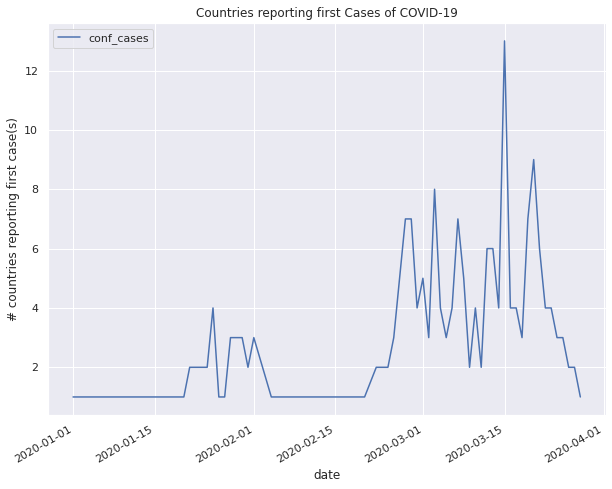

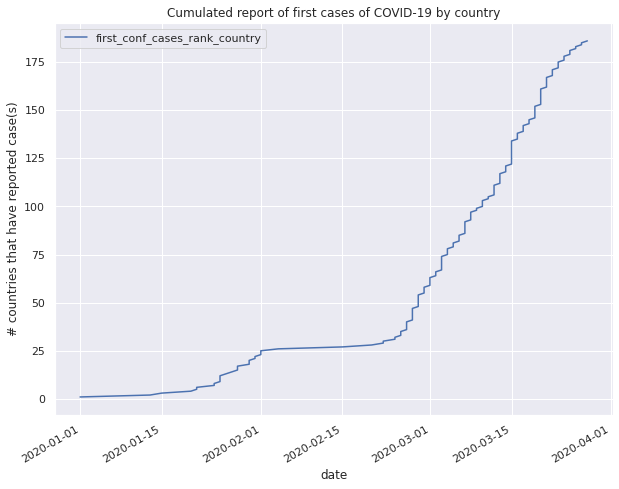

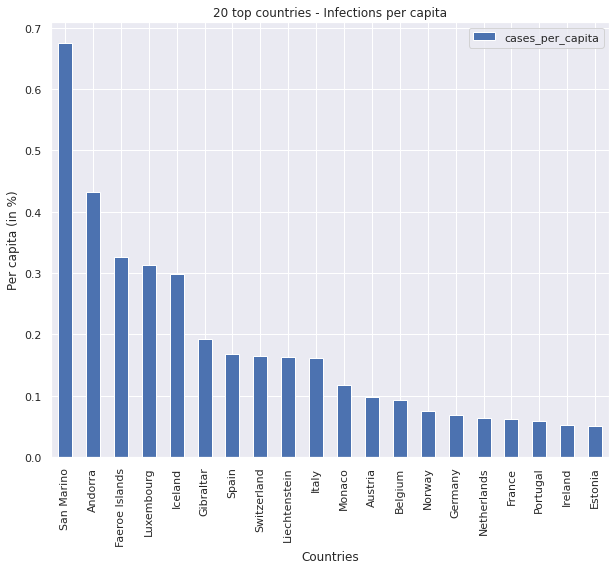

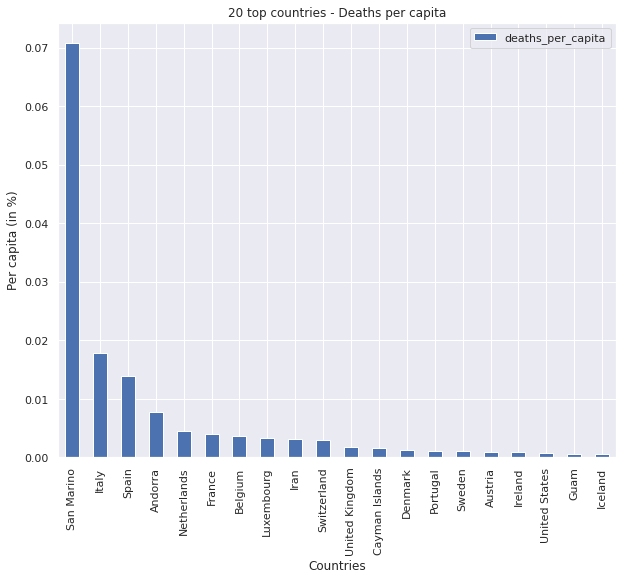

In [0]:
# Country with the min and max school closure. Who has the first response after the first infection.
import datetime as dt
pd.options.mode.chained_assignment = None  # default='warn'

# Reduce dataframe to only include country, date and conf_cases
df_reduced = pd.DataFrame(df, columns = ['country', 'date', 'conf_cases'])

# Only look at countries with more than 0 confirmed cases
filter = df_reduced[['conf_cases']] > 0
df_reduced.where(filter, inplace=True)
filtered_df = df_reduced[df_reduced['conf_cases'].notnull()]

# Reduce dataframe to only include one entry per country, the first case reported, respectively
first_conf_cases = filtered_df.groupby(['country']).first()
# Convert date from int to datetime to represent it better
first_conf_cases['date'] = pd.to_datetime(first_conf_cases['date'].astype(str), format='%Y%m%d', errors='ignore')

# Sort by date in ascending order
sorted_by_date = first_conf_cases.sort_values('date', ascending=True)
bla = sorted_by_date.groupby('date').count()
# Plot how many countries reported their first case at given date
countries_reporting_cases = sorted_by_date.groupby([ sorted_by_date.date ]).count().plot(kind='line')
#print('countries_reporting_cases', type(countries_reporting_cases))
#print('bla', countries_reporting_cases.info())
#sns.lineplot(bla)
plt.grid(True, axis='y')
plt.ylabel('# countries reporting first case(s)')
plt.title('Countries reporting first Cases of COVID-19')


# Plot cumulative number of countries that have reported their first case at given date
sorted_by_date['first_conf_cases_rank_country'] = np.arange(1, len(sorted_by_date) + 1)
sorted_by_date.plot(x='date', y='first_conf_cases_rank_country', kind='line')
plt.ylabel('# countries that have reported case(s)')
plt.title('Cumulated report of first cases of COVID-19 by country')

plt.show()

# merge existing df (sorted_by_date) with population table
result = pd.DataFrame(df, columns = ['country', 'date', 'conf_cases', 'conf_deaths', 'country_pop'])

# Latest date of dataset is 20200330
filter = df[['date']] == 20200330
result.where(filter, inplace=True)
filtered_result = result[result['date'].notnull()]

# Add columns that represent cases per capita and deaths per capita in %.
filtered_result['cases_per_capita'] = (filtered_result['conf_cases'] / filtered_result['country_pop']) * 100
filtered_result['deaths_per_capita'] = (filtered_result['conf_deaths'] / filtered_result['country_pop']) * 100

# Create a sorted list of highest rate of cases per capita and represent it in a bar plot (top 20 countries)
# Todo show actual no of cases in subplot
sort_cases_per_capita = filtered_result.sort_values('cases_per_capita', ascending=False)[['country', 'conf_cases', 'cases_per_capita']][:20]
sort_cases_per_capita.plot(kind='bar', x='country', y='cases_per_capita', title='20 top countries - Infections per capita')
plt.ylabel('Per capita (in %)')
plt.xlabel('Countries')

# Create a sorted list of highest rate of deaths per capita and represent it in a bar plot (top 20 countries)
# Todo show actual no of deaths in subplot
sort_deaths_per_capita = filtered_result.sort_values('deaths_per_capita', ascending=False)[['country', 'conf_cases', 'deaths_per_capita']][:20]
sort_deaths_per_capita.plot(kind='bar', x='country', y='deaths_per_capita', title='20 top countries - Deaths per capita')
plt.ylabel('Per capita (in %)')
plt.xlabel('Countries')

plt.show()

Top 20 countries with highest number of deaths
The following 2 plots are top 20 Countries by number of deaths and confirmed cases. 


1.    Top 20 Countries by numbers of death: This plot shows the cumulative number of deaths over period of 51 days. It is clear from the country with a higher number of deaths was Italy.
2.   Top 20 Countries by numbers of confirmed cases: This plot shows the cumulative number of confirmed cases over period of 51 days. It is clear from the country with a higher number of confirmed cases was the United States.




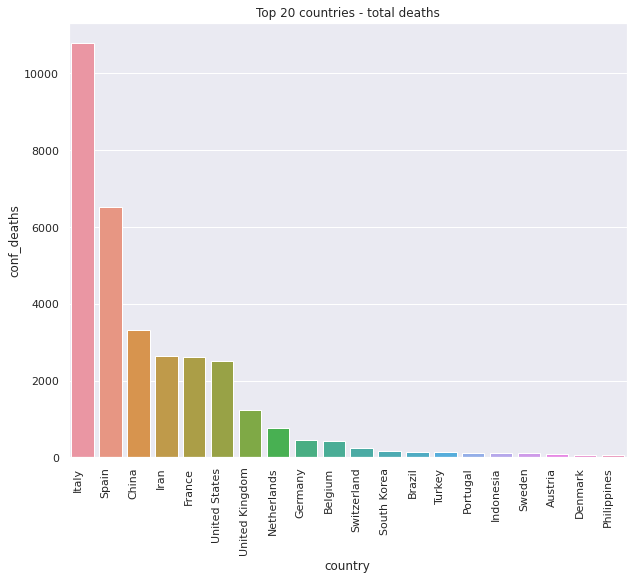

In [116]:
# Total deaths and confirmed cases for each country
# Top 20 countries with highest death rate
country_death_sorted = filtered_result.sort_values('conf_deaths', ascending=False)[['country', 'conf_deaths']][:20]

death_toll_bar_plot = sns.barplot(data=country_death_sorted, x='country', y='conf_deaths');
death_toll_bar_plot.set_xticklabels(death_toll_bar_plot.get_xticklabels(), rotation=90, horizontalalignment='right');
death_toll_bar_plot.set_title('Top 20 countries - total deaths');


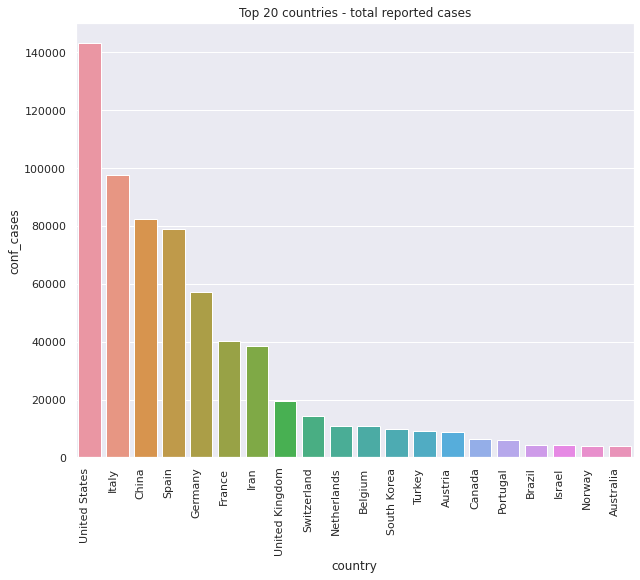

In [117]:
# Top 20 countries with highest number of reported cases

country_cases_sorted = filtered_result.sort_values('conf_cases', ascending=False)[['country', 'conf_cases']][:20]
# country, conf_deaths

death_toll_bar_plot = sns.barplot(data=country_cases_sorted, x='country', y='conf_cases');
death_toll_bar_plot.set_xticklabels(death_toll_bar_plot.get_xticklabels(), rotation=90, horizontalalignment='right');
death_toll_bar_plot.set_title('Top 20 countries - total reported cases');


The following heatmap shows the number of confirmed cases over a period of 51 day. As the time passes we can clearly see the increase in confirmed cases in the United States, China and European Countries

In [0]:
import plotly.express as px

reduced_df = pd.DataFrame(df, columns = ['country', 'date', 'conf_cases', 'conf_deaths', 'country_code'])
# reduced_df['date'] = pd.to_datetime(reduced_df['date'].astype(str), format='%Y%m%d', errors='ignore')

reduced_df = reduced_df.dropna()

reduced_df = reduced_df.sort_values('date')


fig = px.choropleth(reduced_df, locations="country_code", color="conf_cases", hover_name="country", color_continuous_scale= 'electric_r',animation_frame='date')
fig.show()

The following 3 scatterplots plots show the aggregated weekly data for each country from beginning of January to the end of March. Within the code we have created stringency levels based on range of values for the column string_index. 


In the graph, each country is represented by a dot. The plot does not have many dots in the first few weeks as most countries had no
 stringencies, confirmed cases or deaths. In the following weeks, the density of plot increases due to accelarating confirmed cases and deaths.


In [0]:
#Rolling weekly average of stringency,confirmed cases, confirmed deaths over designed time period

#Remove null values to calculate average stringency index
data_clean_final_nan=df.fillna(0)
#Add new column week for aggregating
data_clean_final_nan['week']= pd.DatetimeIndex(data_clean_final_nan['new_date']).week

#Extract aggregated  weekly data for each country
df_weekly_data_final=data_clean_final_nan.groupby(['country','week'],as_index = False).agg({'conf_cases':'max','conf_deaths':'max','string_index':'mean'}).sort_values(ascending=True, by='week')

#Create stringency levels Very Low, Low, Medium, High, Very High
df_weekly_data_final['stringency_level'] = df_weekly_data_final['string_index'] // 25 
look_up = {0.0: 'Very Low', 1.0: 'Low', 2.0: 'Medium', 3.0: 'High', 4.0: 'Very High'}
df_weekly_data_final['stringency_level'] = df_weekly_data_final['stringency_level'].apply(lambda x: look_up[x])

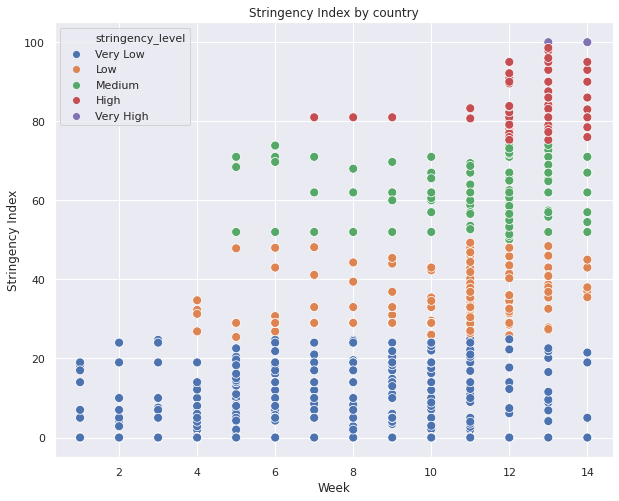

In [0]:
#Scatter plot for average stringency index by no. of countries
sns.set(rc={'figure.figsize':(10,8)})  # Figure size
g = sns.scatterplot(x="week", y="string_index", hue='stringency_level', s=80, data=df_weekly_data_final)
plt.xlabel("Week")
plt.ylabel("Stringency Index")
plt.title("Stringency Index by country")
plt.show(g)

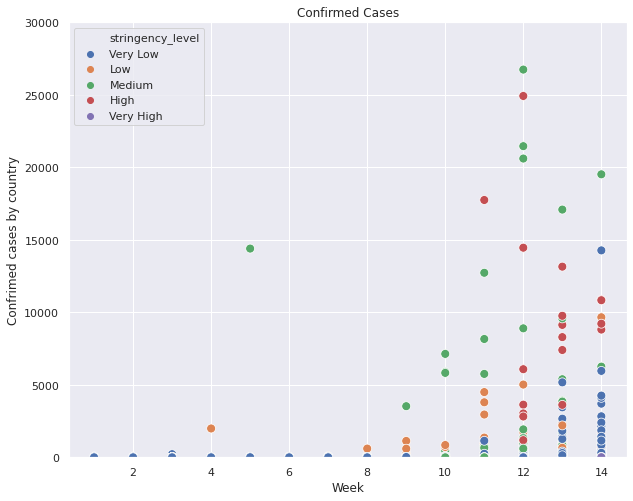

In [0]:
#scatter plot for confirmed cases by no.of countries
g = sns.scatterplot(x="week", y="conf_cases", hue="stringency_level", s=80, data=df_weekly_data_final)
plt.xlabel("Week")
plt.ylabel("Confrimed cases by country")
plt.title("Confirmed Cases")
plt.ylim(0,30000)
plt.show(g)

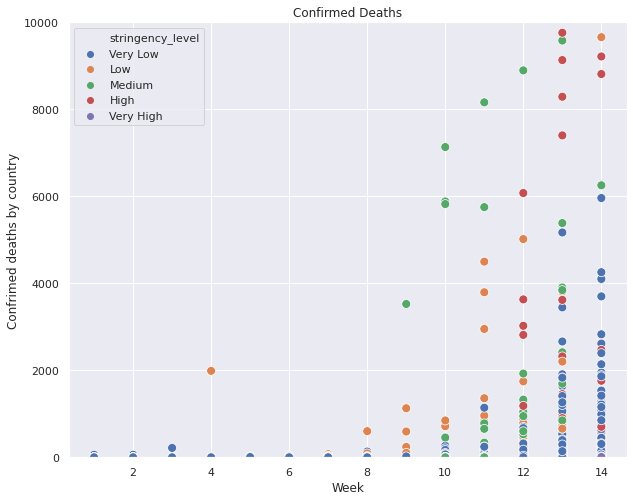

In [0]:
#scatter plot for confirmed deaths by no of countries
g = sns.scatterplot(x="week", y="conf_cases", hue="stringency_level", s=80, data=df_weekly_data_final)
plt.xlabel("Week")
plt.ylabel("Confrimed deaths by country")
plt.title("Confirmed Deaths")
plt.ylim(0,10000)
plt.show(g)

##Prediction model

In [0]:
data_clean_final.info()

# Reduce dataframe to only include variables of interest: country, cases, deaths, and policy restrictions
df = pd.DataFrame(data_clean_final, columns = ['country', 'new_date', 'conf_cases', 'string_index', 'conf_deaths', 'country_pop', 'sch_close',\
                                               'work_close', 'pub_event', 'pub_trans', 'pub_campg', 'int_move', 'int_trvl_ctrl'])

#replace all missing with 0 since these are just flags
list_var = ['sch_close', 'work_close', 'pub_event', 'pub_trans', 'pub_campg', 'int_move', 'int_trvl_ctrl']
  
for x in list_var:
    df[x] = df[x].replace(np.nan, 0)
    
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10659 entries, 0 to 10658
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   country             10659 non-null  object        
 1   country_code        10561 non-null  object        
 2   date                10561 non-null  float64       
 3   sch_close           3967 non-null   float64       
 4   sch_note            761 non-null    object        
 5   work_close          3461 non-null   float64       
 6   work_close_note     547 non-null    object        
 7   pub_event           3720 non-null   float64       
 8   pub_event_note      776 non-null    object        
 9   pub_trans           2489 non-null   float64       
 10  pub_trans_note      524 non-null    object        
 11  pub_campg           4239 non-null   float64       
 12  pub_campg_notes     1260 non-null   object        
 13  int_move            3434 non-null   float64   

,country,new_date,conf_cases,string_index,conf_deaths,country_pop,sch_close,work_close,pub_event,pub_trans,pub_campg,int_move,int_trvl_ctrl
0,Afghanistan,2020-01-01,0.0,0.0,0.0,38728504.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
1,Afghanistan,2020-01-02,0.0,0.0,0.0,38728504.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
2,Afghanistan,2020-01-03,0.0,0.0,0.0,38728504.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,Afghanistan,2020-01-04,0.0,0.0,0.0,38728504.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,Afghanistan,2020-01-05,0.0,0.0,0.0,38728504.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0


In [0]:
#check levels of the dummies; make sure there are only 2
var_list = ['sch_close',	'work_close',	'pub_event',	'pub_trans',	'pub_campg',	'int_move',	'int_trvl_ctrl']

for var in var_list:
  print(df.groupby(var)[var].count())

sch_close
0.0    9005
1.0    1654
Name: sch_close, dtype: int64
work_close
0.0    9686
1.0     973
Name: work_close, dtype: int64
pub_event
0.0    9285
1.0    1374
Name: pub_event, dtype: int64
pub_trans
0.0    10077
1.0      582
Name: pub_trans, dtype: int64
pub_campg
0.0    7541
1.0    3118
Name: pub_campg, dtype: int64
int_move
0.0    9455
1.0    1204
Name: int_move, dtype: int64
int_trvl_ctrl
0.0    7462
1.0    1026
2.0     590
3.0    1581
Name: int_trvl_ctrl, dtype: int64


In [0]:
# Only look at countries with more than 0 confirmed cases, deaths, and a string_index
filter = ((df[['conf_cases']] > 0) & (df[['string_index']] > 0))
df.where(filter, inplace=True)
filtered_df = df[(df['conf_cases'].notnull()) & (df['string_index'].notnull()) & (df['conf_deaths'].notnull())]

# Reduce dataframe to only include one entry per country, take the most recent data
last_conf_cases = filtered_df.groupby(['country']).last()

#make int_trvl_ctrl flag into strings as there are 4 levels
last_conf_cases['int_trvl_ctrl'] = last_conf_cases['int_trvl_ctrl'].replace([0, 1, 2, 3], ['none', 'screen', 'quar', 'ban'])
last_conf_cases.head()

#get dummies for intrl_travels since it has 4 levels
last_conf_cases_final = pd.get_dummies(last_conf_cases, columns=['int_trvl_ctrl'], drop_first=True)
last_conf_cases_final.head()
last_conf_cases_final.index

Index(['Afghanistan', 'Algeria', 'Angola', 'Argentina', 'Aruba', 'Australia',
       'Austria', 'Barbados', 'Belgium', 'Belize', 'Bermuda', 'Bolivia',
       'Brazil', 'Bulgaria', 'Canada', 'Chile', 'China', 'Colombia',
       'Costa Rica', 'Croatia', 'Czech Republic',
       'Democratic Republic of Congo', 'Denmark', 'Dominican Republic',
       'Ecuador', 'Finland', 'France', 'Germany', 'Greece', 'Guatemala',
       'Guyana', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Japan', 'Jordan',
       'Kazakhstan', 'Kenya', 'Malaysia', 'Mexico', 'Myanmar', 'Netherlands',
       'New Zealand', 'Nigeria', 'Norway', 'Pakistan', 'Panama',
       'Papua New Guinea', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia',
       'Rwanda', 'Serbia', 'Singapore', 'Slovak Republic', 'Slovenia',
       'South Africa', 'South Korea', 'Spain', 'Sri Lanka', 'Sweden',
       'Switzerland', 'Syria', 'Taiwan', 'Tanzania', 'Thailand', 'Turkey',
  

In [0]:
#see how many unique countries
len(last_conf_cases_final.index.unique())

83

In [0]:
#create dataframe for prediction. make sure no missing values
df_pred = last_conf_cases_final.copy()
df_pred.head()
df_pred.isnull().sum()
#good, there are no missing values

country_code             0
date                     0
sch_close                4
sch_note                 9
work_close               9
work_close_note         14
pub_event                4
pub_event_note          11
pub_trans               25
pub_trans_note          25
pub_campg_notes         19
int_move                 7
int_move_note           15
int_trvl_ctrl_note       8
fiscal_meas             12
fiscal_meas_note        24
mont_meas               19
mont_meas_note          37
invest_hc               18
invest_hc_note          42
invest_vacc             22
invest_vacc_note        57
conf_cases               0
conf_deaths              0
string_index             0
new_date                 0
int_trvl_ctrl_none       0
int_trvl_ctrl_quar       0
int_trvl_ctrl_screen     0
dtype: int64

In [0]:
#max date is 3/30/2020.
print(df_pred.new_date.max())
print(df_pred.conf_deaths.head())
#get data for confirmed cases and deaths for 2 weeks or so after this date. this will be the Y that we will predict

2020-03-30 00:00:00
country
Afghanistan     4.0
Algeria        29.0
Angola          2.0
Argentina      20.0
Aruba           0.0
Name: conf_deaths, dtype: float64


In [0]:
#get unique list of countries to subset april data to appropriate countries
countries_list = list(df_pred.index.unique())
countries_list

['Afghanistan',
 'Algeria',
 'Angola',
 'Argentina',
 'Aruba',
 'Australia',
 'Austria',
 'Barbados',
 'Belgium',
 'Belize',
 'Bermuda',
 'Bolivia',
 'Brazil',
 'Bulgaria',
 'Canada',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Czech Republic',
 'Democratic Republic of Congo',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Guatemala',
 'Guyana',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Malaysia',
 'Mexico',
 'Myanmar',
 'Netherlands',
 'New Zealand',
 'Nigeria',
 'Norway',
 'Pakistan',
 'Panama',
 'Papua New Guinea',
 'Poland',
 'Portugal',
 'Qatar',
 'Romania',
 'Russia',
 'Rwanda',
 'Serbia',
 'Singapore',
 'Slovak Republic',
 'Slovenia',
 'South Africa',
 'South Korea',
 'Spain',
 'Sri Lanka',
 'Sweden',
 'Switzerland',
 'Syria',
 'Taiwan',
 'Tanzania',
 'Thailand',
 'Turkey',
 'Uganda',
 'Ukraine',
 

In [0]:
#import dataset with confirmed cases and death in april for our y (outcome of interest)
april_data = pd.read_csv('/content/drive/Shared drives/IS833 team 4 project/covid_19_clean_complete.csv')
print(april_data['Country/Region'].unique())
print(april_data.head())
april_data.info()

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Brazil'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Congo (Brazzaville)' 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Diamond Princess' 'Cuba' 'Cyprus' 'Czechia' 'Denmark'
 'Djibouti' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji'
 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Guatemala' 'Guinea' 'Guyana' 'Haiti' 'Holy See' 'Honduras' 'Hungary'
 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'South Korea' 'Kuwait'
 'Kyrgyzstan' 'Latvia' 'Lebanon' 'Li

In [0]:
#rename countries so consistent with df_pred
april_data['Country/Region'] = april_data[['Country/Region']].replace("US", "United States")\
.replace("UK", "United Kingdom").replace("Mainland China", "China")
print(april_data['Country/Region'].unique())

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Brazil'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Congo (Brazzaville)' 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Diamond Princess' 'Cuba' 'Cyprus' 'Czechia' 'Denmark'
 'Djibouti' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji'
 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Guatemala' 'Guinea' 'Guyana' 'Haiti' 'Holy See' 'Honduras' 'Hungary'
 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'South Korea' 'Kuwait'
 'Kyrgyzstan' 'Latvia' 'Lebanon' 'Li

In [0]:
#subset april data to countries in countries_list (countries in prediction dataset)
april_data_subset = april_data[april_data['Country/Region'].isin(countries_list)]
len(april_data_subset['Country/Region'].unique())
print(april_data_subset.head())

#get unique list of countries to subset april data to appropriate countries
aprl_countries_list = list(april_data_subset['Country/Region'].unique())
aprl_countries_list

                 Province/State Country/Region  ...  Deaths  Recovered
0                           NaN    Afghanistan  ...       0          0
2                           NaN        Algeria  ...       0          0
4                           NaN         Angola  ...       0          0
6                           NaN      Argentina  ...       0          0
8  Australian Capital Territory      Australia  ...       0          0

[5 rows x 8 columns]


['Afghanistan',
 'Algeria',
 'Angola',
 'Argentina',
 'Australia',
 'Austria',
 'Barbados',
 'Belgium',
 'Bolivia',
 'Brazil',
 'Bulgaria',
 'Canada',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Guatemala',
 'Guyana',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'South Korea',
 'Malaysia',
 'Mexico',
 'Netherlands',
 'New Zealand',
 'Nigeria',
 'Norway',
 'Pakistan',
 'Panama',
 'Papua New Guinea',
 'Poland',
 'Portugal',
 'Qatar',
 'Romania',
 'Russia',
 'Rwanda',
 'Serbia',
 'Singapore',
 'Slovenia',
 'South Africa',
 'Spain',
 'Sri Lanka',
 'Sweden',
 'Switzerland',
 'Tanzania',
 'Thailand',
 'Turkey',
 'Uganda',
 'Ukraine',
 'United Kingdom',
 'United States',
 'Venezuela',
 'Vietnam',
 'Zimbabwe',
 'Syria',
 'Belize']

In [0]:
df_pred_new = df_pred[df_pred.index.isin(aprl_countries_list)]
len(df_pred.index.unique())

83

In [0]:
df_pred_new = df_pred_new.sort_values(by='country')

In [0]:
#group and clean april data by group and to specific apirl date
april_data_subset.groupby('Country/Region')['Country/Region'].count()

Country/Region
Afghanistan         96
Algeria             96
Angola              96
Argentina           96
Australia          768
                  ... 
United Kingdom    1056
United States       96
Venezuela           96
Vietnam             96
Zimbabwe            96
Name: Country/Region, Length: 76, dtype: int64

In [0]:
#we subset the april data to 4/17/20 because it is approx 2 weeks after the 3/30/20 date and a relevant period given incubation for COVID-19
april_data_subset_week = april_data_subset[april_data_subset['Date'] == '4/17/20']
april_data_4_17= april_data_subset_week.groupby('Country/Region').agg({'Confirmed':'sum','Deaths':'sum'})

In [0]:
#As a sensitivity we subset the april data to 4/24/20
april_data_subset_week = april_data_subset[april_data_subset['Date'] == '4/24/20']
april_data_4_24= april_data_subset_week.groupby('Country/Region').agg({'Confirmed':'sum','Deaths':'sum'})

In [0]:
df_pred_new

,new_date,conf_cases,string_index,conf_deaths,country_pop,sch_close,work_close,pub_event,pub_trans,pub_campg,int_move,int_trvl_ctrl_none,int_trvl_ctrl_quar,int_trvl_ctrl_screen
country,,,,,,,,,,,,,,
Afghanistan,2020-03-30,114.0,57.0,4.0,38728504.0,1.0,0.0,0.0,0.0,1.0,0.0,0,1,0
Algeria,2020-03-30,454.0,62.0,29.0,43672620.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0,0
Angola,2020-03-30,7.0,62.0,2.0,32627944.0,1.0,1.0,1.0,1.0,1.0,1.0,0,1,0
Argentina,2020-03-30,820.0,43.0,20.0,45104437.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0,0
Australia,2020-03-30,4093.0,10.0,16.0,25434316.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Kingdom,2020-03-30,19522.0,71.0,1228.0,67808264.0,1.0,1.0,1.0,0.0,1.0,1.0,1,0,0
United States,2020-03-30,143025.0,67.0,2509.0,330578810.0,0.0,0.0,0.0,1.0,1.0,0.0,0,0,0
Venezuela,2020-03-30,119.0,83.0,1.0,28453143.0,1.0,1.0,0.0,0.0,0.0,1.0,0,0,0


In [0]:
print(april_data_4_17.head())
print(april_data_4_24.head())

                Confirmed  Deaths
Country/Region                   
Afghanistan           906      30
Algeria              2418     364
Angola                 19       2
Argentina            2669     123
Australia            6522      66
                Confirmed  Deaths
Country/Region                   
Afghanistan          1351      43
Algeria              3127     415
Angola                 25       2
Argentina            3607     176
Australia            6677      79


In [0]:
#merge Confirmed cases in April onto prediction dataset. Do so for 4/17 data and 4/24 data

merged_4_17 = df_pred_new.merge(april_data_4_17, left_on=df_pred_new.index, right_on='Country/Region')
merged_4_24 = df_pred_new.merge(april_data_4_24, left_on=df_pred_new.index, right_on='Country/Region')

#create per capita metrics for prediction. Per capita more information than absolute cases and deaths

#for 4/17 data
merged_4_17['conf_per_capita_new'] = merged_4_17['Confirmed']/merged_4_17['country_pop']
merged_4_17['death_per_capita_new'] = merged_4_17['Deaths']/merged_4_17['country_pop']

merged_4_17['conf_per_capita'] = merged_4_17['conf_cases']/merged_4_17['country_pop']
merged_4_17['death_per_capita'] = merged_4_17['conf_deaths']/merged_4_17['country_pop']

#for 4/24 data
merged_4_24['conf_per_capita_new'] = merged_4_24['Confirmed']/merged_4_24['country_pop']
merged_4_24['death_per_capita_new'] = merged_4_24['Deaths']/merged_4_24['country_pop']

merged_4_24['conf_per_capita'] = merged_4_24['conf_cases']/merged_4_24['country_pop']
merged_4_24['death_per_capita'] = merged_4_24['conf_deaths']/merged_4_24['country_pop']

print(merged_4_17.head())
print(merged_4_24.head())

  Country/Region   new_date  ...  conf_per_capita  death_per_capita
0    Afghanistan 2020-03-30  ...     2.943568e-06      1.032831e-07
1        Algeria 2020-03-30  ...     1.039553e-05      6.640316e-07
2         Angola 2020-03-30  ...     2.145400e-07      6.129715e-08
3      Argentina 2020-03-30  ...     1.818003e-05      4.434154e-07
4      Australia 2020-03-30  ...     1.609243e-04      6.290714e-07

[5 rows x 21 columns]
  Country/Region   new_date  ...  conf_per_capita  death_per_capita
0    Afghanistan 2020-03-30  ...     2.943568e-06      1.032831e-07
1        Algeria 2020-03-30  ...     1.039553e-05      6.640316e-07
2         Angola 2020-03-30  ...     2.145400e-07      6.129715e-08
3      Argentina 2020-03-30  ...     1.818003e-05      4.434154e-07
4      Australia 2020-03-30  ...     1.609243e-04      6.290714e-07

[5 rows x 21 columns]


Linear Regression Model - predict the number of confirmed cases and deaths by April 17th and April 24th

In [0]:
#import relevant packages

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [0]:
#define function to run linear regression.

def linear(datain, covars, outcome):

  #Feature matrix
  X = datain[covars]
  print(X.shape)
  X.head()

  #target vector
  y = datain[outcome]
  y
  y.shape

  #create train and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=833)

  #instantiate linear model
  model = LinearRegression()

  #fit model to training data
  model.fit(X_train, y_train)

  #predict on test data
  y_model = model.predict(X_test)

  #get coefficients from the model 
  print(model.coef_)
  print(X_train.columns)

  #Create a dataframe of coefficients so easily readable
  coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(model.coef_))], axis = 1)
  print(coefficients)

  #look at predicted values
  test = X_test.join(y_test).reset_index()
  test.join(pd.Series(y_model, name='predicted')).head()

  #calculate metrics
  print("Model mean absolute errors is:", mean_absolute_error(y_test, y_model), "for", outcome)
  print("Model mean squared errors is:", mean_squared_error(y_test, y_model), "for", outcome)
  print("Model R2 is:", r2_score(y_test, y_model), "for", outcome)

In [0]:
#run model to predict confirmed cases on april 17th

linear(merged_4_17, ['string_index', 'sch_close', 'work_close', 'pub_event', 'pub_trans', 'pub_campg', 'int_move', 'int_trvl_ctrl_none',\
           'int_trvl_ctrl_quar', 'int_trvl_ctrl_screen', 'conf_per_capita'], 'conf_per_capita_new' )

(76, 11)
[-9.18173769e-06  6.17102830e-05  2.94940102e-05  3.78733573e-05
 -7.51759279e-05  1.66655953e-04  9.07059495e-05  3.05168491e-05
 -3.92728942e-04 -3.74407420e-04  2.45707550e+00]
Index(['string_index', 'sch_close', 'work_close', 'pub_event', 'pub_trans',
       'pub_campg', 'int_move', 'int_trvl_ctrl_none', 'int_trvl_ctrl_quar',
       'int_trvl_ctrl_screen', 'conf_per_capita'],
      dtype='object')
                       0         0
0           string_index -0.000009
1              sch_close  0.000062
2             work_close  0.000029
3              pub_event  0.000038
4              pub_trans -0.000075
5              pub_campg  0.000167
6               int_move  0.000091
7     int_trvl_ctrl_none  0.000031
8     int_trvl_ctrl_quar -0.000393
9   int_trvl_ctrl_screen -0.000374
10       conf_per_capita  2.457075
Model mean absolute errors is: 0.00039156731222700516 for conf_per_capita_new
Model mean squared errors is: 3.713106885800282e-07 for conf_per_capita_new
Model R2 is:

The model is OK. R2 is 0.73, however, unsurprisingly the best predictors of confirmed cases in two weeks is the number of confirmed cases now as shown by the conf_per_capita coefficient of 2.45



In [0]:
#run model to predict deaths on april 17th

linear(merged_4_17, ['string_index', 'sch_close', 'work_close', 'pub_event', 'pub_trans', 'pub_campg', 'int_move', 'int_trvl_ctrl_none',\
           'int_trvl_ctrl_quar', 'int_trvl_ctrl_screen', 'death_per_capita'], 'death_per_capita_new' )

(76, 11)
[-6.82735944e-07 -1.32187941e-05  3.19413721e-05  2.86222219e-06
 -4.01026515e-05  2.18725937e-05  2.44556874e-05 -9.06157306e-06
 -2.81353677e-05 -4.50827455e-05  3.77240371e+00]
Index(['string_index', 'sch_close', 'work_close', 'pub_event', 'pub_trans',
       'pub_campg', 'int_move', 'int_trvl_ctrl_none', 'int_trvl_ctrl_quar',
       'int_trvl_ctrl_screen', 'death_per_capita'],
      dtype='object')
                       0             0
0           string_index -6.827359e-07
1              sch_close -1.321879e-05
2             work_close  3.194137e-05
3              pub_event  2.862222e-06
4              pub_trans -4.010265e-05
5              pub_campg  2.187259e-05
6               int_move  2.445569e-05
7     int_trvl_ctrl_none -9.061573e-06
8     int_trvl_ctrl_quar -2.813537e-05
9   int_trvl_ctrl_screen -4.508275e-05
10      death_per_capita  3.772404e+00
Model mean absolute errors is: 4.0842600457518254e-05 for death_per_capita_new
Model mean squared errors is: 5.075917

The model does not do a good job of predict deaths in two weeks. R2 is only 0.36. Again, unsurprisingly the best predictors of deaths in two weeks is the number of deaths now as shown by the conf_per_capita coefficient of 3.77. The other variables do not seem to have much of an effect.




In [0]:
#run model to predict confirmed cases on april 24th

linear(merged_4_24, ['string_index', 'sch_close', 'work_close', 'pub_event', 'pub_trans', 'pub_campg', 'int_move', 'int_trvl_ctrl_none',\
           'int_trvl_ctrl_quar', 'int_trvl_ctrl_screen', 'conf_per_capita'], 'conf_per_capita_new' )

(76, 11)
[-1.15122420e-05 -8.23393973e-06 -7.57858383e-05  3.18202186e-05
 -2.41256934e-05  3.18121172e-04  1.73910719e-04  5.70597859e-05
 -6.05452296e-04 -5.99869230e-04  2.66627321e+00]
Index(['string_index', 'sch_close', 'work_close', 'pub_event', 'pub_trans',
       'pub_campg', 'int_move', 'int_trvl_ctrl_none', 'int_trvl_ctrl_quar',
       'int_trvl_ctrl_screen', 'conf_per_capita'],
      dtype='object')
                       0         0
0           string_index -0.000012
1              sch_close -0.000008
2             work_close -0.000076
3              pub_event  0.000032
4              pub_trans -0.000024
5              pub_campg  0.000318
6               int_move  0.000174
7     int_trvl_ctrl_none  0.000057
8     int_trvl_ctrl_quar -0.000605
9   int_trvl_ctrl_screen -0.000600
10       conf_per_capita  2.666273
Model mean absolute errors is: 0.000523587977884317 for conf_per_capita_new
Model mean squared errors is: 6.169328692924407e-07 for conf_per_capita_new
Model R2 is: 0

The model is not as effective with 4/24 data. R2 is lower from 0.73 to 0.61. Similar results overall though.






In [0]:
#run model to predict deaths on april 24th

linear(merged_4_24, ['string_index', 'sch_close', 'work_close', 'pub_event', 'pub_trans', 'pub_campg', 'int_move', 'int_trvl_ctrl_none',\
           'int_trvl_ctrl_quar', 'int_trvl_ctrl_screen', 'death_per_capita'], 'death_per_capita_new' )

(76, 11)
[-1.14985929e-06 -1.35266547e-05  3.92783781e-05  1.90002979e-06
 -4.70128586e-05  3.72907366e-05  3.54940247e-05 -1.48006507e-06
 -4.34671167e-05 -6.36767203e-05  4.30855153e+00]
Index(['string_index', 'sch_close', 'work_close', 'pub_event', 'pub_trans',
       'pub_campg', 'int_move', 'int_trvl_ctrl_none', 'int_trvl_ctrl_quar',
       'int_trvl_ctrl_screen', 'death_per_capita'],
      dtype='object')
                       0         0
0           string_index -0.000001
1              sch_close -0.000014
2             work_close  0.000039
3              pub_event  0.000002
4              pub_trans -0.000047
5              pub_campg  0.000037
6               int_move  0.000035
7     int_trvl_ctrl_none -0.000001
8     int_trvl_ctrl_quar -0.000043
9   int_trvl_ctrl_screen -0.000064
10      death_per_capita  4.308552
Model mean absolute errors is: 5.721142898552421e-05 for death_per_capita_new
Model mean squared errors is: 9.248772489067621e-09 for death_per_capita_new
Model R2 i

The model does not do a good job of predicting deaths for 4/24. R2 is lower compared to 4/17 data (0.31 vs 0.36).



Death models not as good as confirmed cases models. 4/17 or 4/24 data results are similar, no significant difference besdies a better R2 with closer data (4/17).

# Additional Models


*   We consider ridge and lasso linear models below in order to better predict the number of confirmed cases and deaths by 4/17 and 4/24


In [0]:
#Consdier regularized linear model. Ridge regression given certain variables will be more important than others, e.g., confirmed cases is probably the most important

#create function to display cv score and alpha

def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)
    std_error = cv_scores_std / np.sqrt(10)
    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

In [0]:
  #Setup data to enable cross validation and alpha determination below

  #Feature matrix
  X = merged_4_17[['string_index', 'sch_close', 'work_close', 'pub_event', 'pub_trans', 'pub_campg', 'int_move', 'int_trvl_ctrl_none',\
           'int_trvl_ctrl_quar', 'int_trvl_ctrl_screen', 'conf_per_capita']]
  print(X.shape)
  X.head()

  #target vector
  y = merged_4_17['conf_per_capita_new']
  y
  y.shape

  #create train and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=833)


(76, 11)


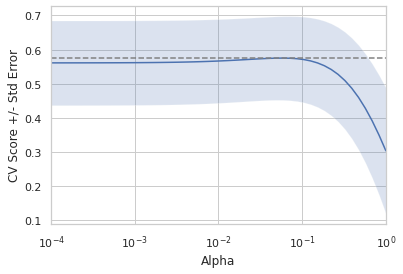

Use alpha: 0.3031153467293021


In [0]:
#Cross validate to determine appropriate alpha score

# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)
print("Use alpha:", np.mean(ridge_cv_scores))

In [0]:
#import Ridge linear model

from sklearn.linear_model import Ridge

#ridge regression function

def ridge (datain):

  #Setup data to run various linear regressions

  #Feature matrix
  X = datain[['string_index', 'sch_close', 'work_close', 'pub_event', 'pub_trans', 'pub_campg', 'int_move', 'int_trvl_ctrl_none',\
           'int_trvl_ctrl_quar', 'int_trvl_ctrl_screen', 'conf_per_capita']]
  print(X.shape)
  X.head()

  #target vector
  y = datain['conf_per_capita_new']
  y
  y.shape

  #create train and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=833)
  ridge = Ridge(alpha=0.3031153467293021, normalize=True) #use alpha validated above
  ridge.fit(X_train, y_train)
  ridge_pred = ridge.predict(X_test)

  #print coefficients into a readable dataset
  coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(ridge.coef_))], axis = 1)
  print(coefficients)
  
  print("R2 is:", ridge.score(X_test, y_test))

  #look at predicted values
  test = X_test.join(y_test).reset_index()
  tested_join = test.join(pd.Series(ridge_pred, name='predicted')).head()
  print(tested_join.head())

  #get fit stats
  print("Model mean absolute errors is:", mean_absolute_error(y_test, ridge_pred))
  print("Model mean squared errors is:", mean_squared_error(y_test, ridge_pred))

In [0]:
#ridge model wtih 4/17 data
ridge(merged_4_17)

(76, 11)
                       0         0
0           string_index -0.000002
1              sch_close -0.000038
2             work_close -0.000048
3              pub_event  0.000053
4              pub_trans -0.000082
5              pub_campg  0.000091
6               int_move  0.000070
7     int_trvl_ctrl_none  0.000096
8     int_trvl_ctrl_quar -0.000286
9   int_trvl_ctrl_screen -0.000320
10       conf_per_capita  1.837099
R2 is: 0.8818597878189339
   index  string_index  ...  conf_per_capita_new  predicted
0     56          38.0  ...             0.000651   0.000685
1      7          86.0  ...             0.003121   0.002043
2     47          93.0  ...             0.000032   0.000225
3     26          71.0  ...             0.000080   0.000404
4      9          93.0  ...             0.000040   0.000233

[5 rows x 14 columns]
Model mean absolute errors is: 0.00034613122254917924
Model mean squared errors is: 1.6272641450860283e-07


Ridge model is better than  linear regression before (0.88 vs. 0.73). Besides current confirmed cases, it appears international travel quarantining (i.e., quarantining arrivals from high risk regions) and international travel screening are most effective in reduces cases. Mean absoulute error and squared errors are minimal meaning the fit is good.

In [0]:
#ridge model wtih 4/24 data
ridge(merged_4_24)

(76, 11)
                       0         0
0           string_index -0.000003
1              sch_close -0.000111
2             work_close -0.000128
3              pub_event  0.000052
4              pub_trans -0.000045
5              pub_campg  0.000186
6               int_move  0.000103
7     int_trvl_ctrl_none  0.000137
8     int_trvl_ctrl_quar -0.000421
9   int_trvl_ctrl_screen -0.000462
10       conf_per_capita  2.009704
R2 is: 0.8002553503552019
   index  string_index  ...  conf_per_capita_new  predicted
0     56          38.0  ...             0.000758   0.000929
1      7          86.0  ...             0.003825   0.002357
2     47          93.0  ...             0.000054   0.000280
3     26          71.0  ...             0.000093   0.000529
4      9          93.0  ...             0.000069   0.000288

[5 rows x 14 columns]
Model mean absolute errors is: 0.00046941694405797807
Model mean squared errors is: 3.1749030982116967e-07


As expected model is not as good with 4/24 data. Still, R2 of ridge model is better than linear model before (0.80 vs 0.61).

## Exploratory model

In [0]:
#Lasso model was not as effective
from sklearn.linear_model import Lasso

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=833)
lasso = Lasso(alpha=0.3, normalize=True)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso.score(X_test, y_test)

-0.0006475032593553642

Overall the policy restriction indicators are not good predictors of confirmed cases and deaths of the coronovirus. Perhaps more sophisticated and models that take into account time-varying covariates would be able to accuratly reflect the effects of societal restrictions on confirmed cases and deaths.